# Import Packages

In [5]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pickle
import cv2
import glob
import math
# when you want an inline plot
%matplotlib inline
#when you want graphs in a separate window
# %matplotlib qt 

# Helper Functions

In [11]:
import math



def get_dist_imgs(images, objpoints, imgpoints):
    undist_imgs = []
    # Test undistortion on an image
    for img in images:
        img_size = (img.shape[1], img.shape[0])
        # Do camera calibration given object points and image points
        ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
        dst = cv2.undistort(img, mtx, dist, None, mtx)
        undist_imgs.append(undst)
#         cv2.imwrite('calibration_wide/test_undist.jpg',undst)
        # Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
    dist_pickle = {}
    dist_pickle["mtx"] = mtx
    dist_pickle["dist"] = dist
    pickle.dump( dist_pickle, open( "camera_cal/wide_dist_pickle.p", "wb" ))
    return undist_imgs

def get_cal_imgs(images, objp):
    cal_imgs = []
    # Arrays to store object points and image points from all the images.
    objpoints = [] # 3d points in real world space
    imgpoints = [] # 2d points in image plane.
    # Make a list of calibration images
#     images = glob.glob('../camera_cal/calibration*.jpg')
    # Step through the list and search for chessboard corners
    for fname in images:
        img = cv2.imread(fname)
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (9,6),None)
        # If found, add object points, image points
        if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)

            # Draw and display the corners
            img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
            cal_imgs.append(img)
    #         cv2.imshow('img',img)
    #         cv2.waitKey(500)

    # cv2.destroyAllWindows()
    return cal_imgs , objpoints, imgpoints

def show_images(images_list, caption=[], pref="",  fig_size=(14,14), cols=5):
#     cols=3
#     fig_size=(15,15)
    
    cmap = None
    num_img = len(images_list)
    r = num_img / cols
    if isinstance(r, float):
        rows = math.ceil(r)  
    plt.figure(figsize=fig_size)
    for i in range(num_img):
        plt.subplot(rows, cols, i+1)
        if len(images_list[i].shape) == 2:
            cmap = 'gray'
        if len(caption) > 0:
            plt.title(pref + caption[i])
        plt.imshow(images_list[i], cmap=cmap)
    plt.tight_layout()
    plt.show()
    
def read_image(img):
    return mpimg.imread(os.path.join(img))

def save_image(images_list, caption, pref="test", folder="output_images"):
    if not os.path.exists(folder):
        os.mkdir(folder)
    for img, name in zip(images_list, caption):
        path = folder + "/" + pref + "_" + name
        Image.fromarray(img).save(path)

# Read in an Images

In [8]:
import os
path = "camera_cal/"
imgs_names = os.listdir(path)
imgs_names_path = list(map(lambda name: path + name, imgs_names))
print(len(imgs_names))
print(imgs_names)
all_images = [read_image(path + name) for name in imgs_names]
original_imgs = np.copy(all_images)
# len(imgs_names_path)

20
['calibration5.jpg', 'calibration7.jpg', 'calibration2.jpg', 'calibration19.jpg', 'calibration11.jpg', 'calibration13.jpg', 'calibration20.jpg', 'calibration15.jpg', 'calibration4.jpg', 'calibration17.jpg', 'calibration10.jpg', 'calibration9.jpg', 'calibration16.jpg', 'calibration18.jpg', 'calibration8.jpg', 'calibration3.jpg', 'calibration14.jpg', 'calibration12.jpg', 'calibration1.jpg', 'calibration6.jpg']


# Function used to show a list of images

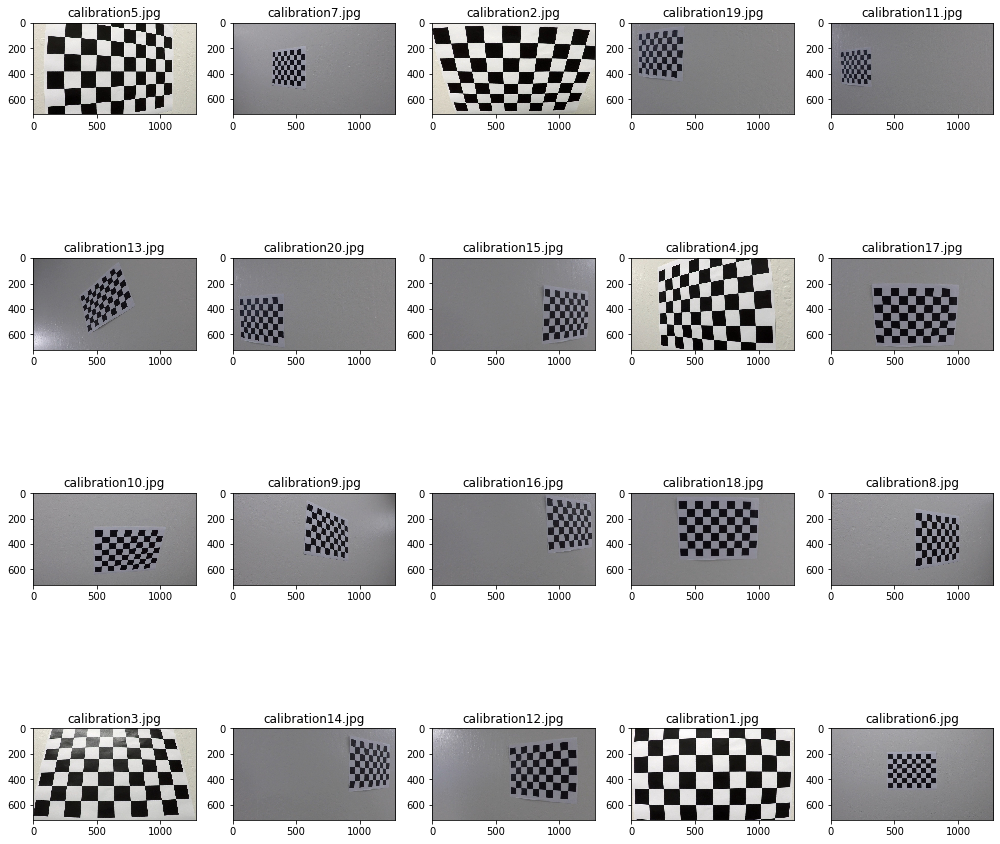

In [9]:
show_images(original_imgs, imgs_names, cols=5)

# Build a Lane Finding Pipeline
<font size="3">The goals / steps of this project are the following:

- Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
- Apply a distortion correction to raw images.
- Use color transforms, gradients, etc., to create a thresholded binary image.
- Apply a perspective transform to rectify binary image ("birds-eye view").
- Detect lane pixels and fit to find the lane boundary.
- Determine the curvature of the lane and vehicle position with respect to center.
- Warp the detected lane boundaries back onto the original image.
- Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.</font>

# Step 1: Compute the camera calibration matrix and distortion coefficients

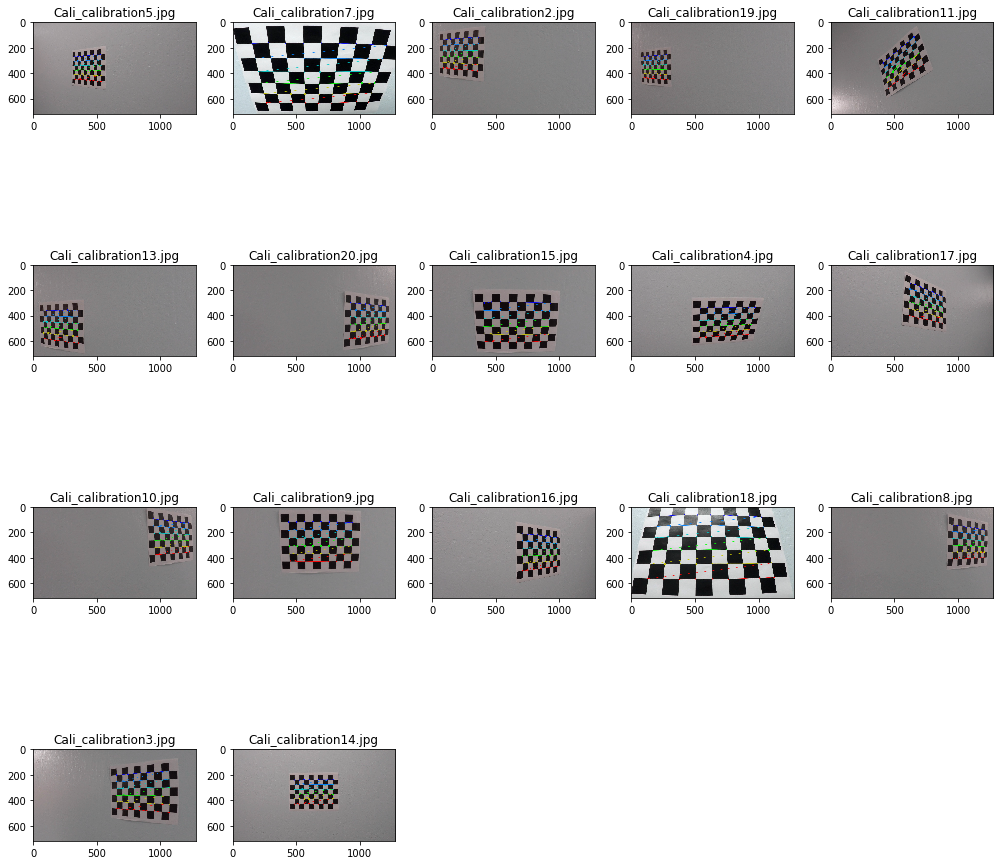

In [14]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2) #that will shape coordinate back to two colomns x and y

cal_imgs, objpoints, imgpoints = get_cal_imgs(imgs_names_path, objp)
show_images(cal_imgs, imgs_names, pref="Cali_")

# Step 2: Calibrate, calculate distortion coefficients, and test undistortion on images

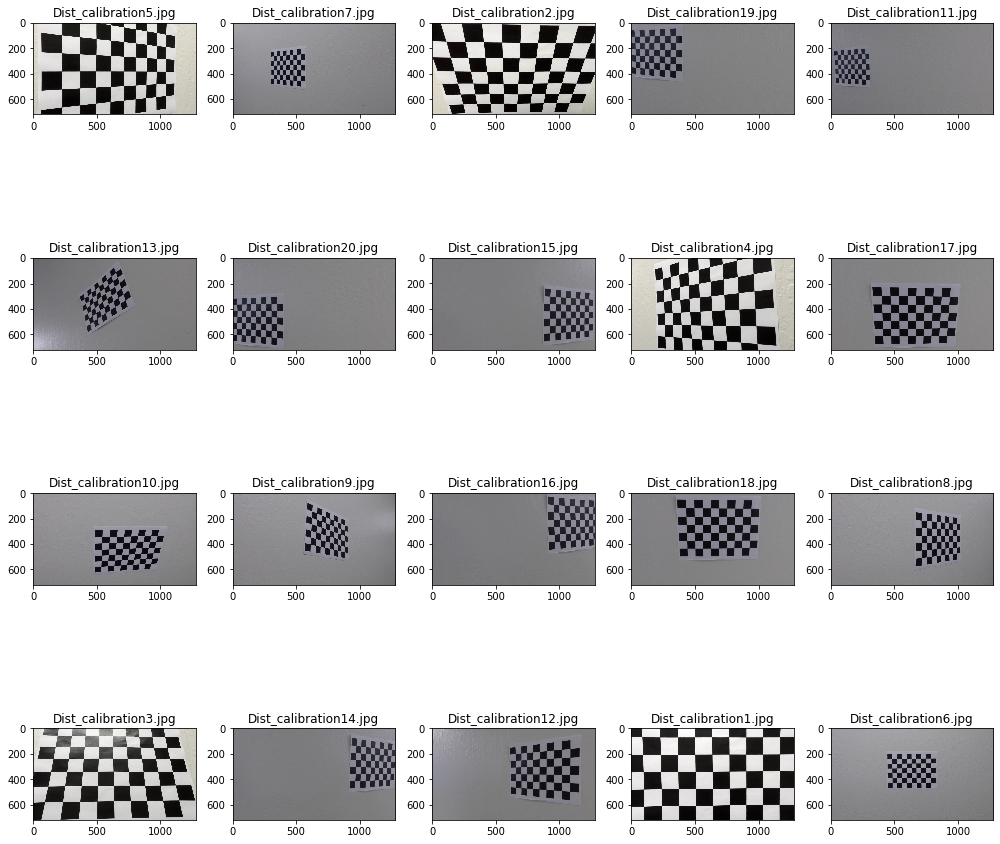

In [17]:
dist_imgs = get_dist_imgs(original_imgs, objpoints, imgpoints)
show_images(dist_imgs, imgs_names, pref = "Dist_")